Team2Awesome readnoise =  11.3065684861
TeamNot6 readnoise =  10.1741911435
Sharknado readnoise =  9.05606254814
Group4 readnoise =  2.26294937361
Team5 readnoise =  11.303307776
Trogo readnoise =  11.3131245172
gain for our data set =  2.0


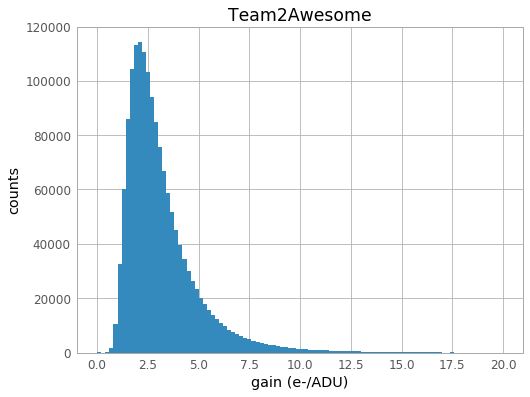

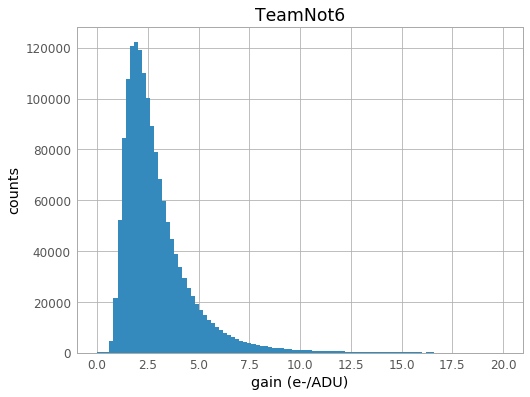

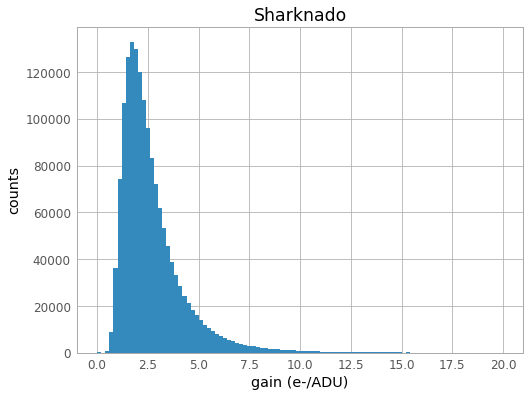

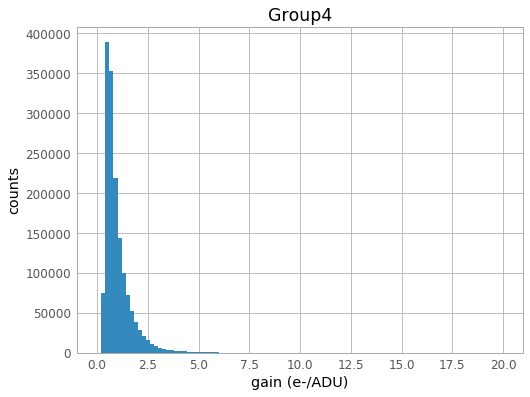

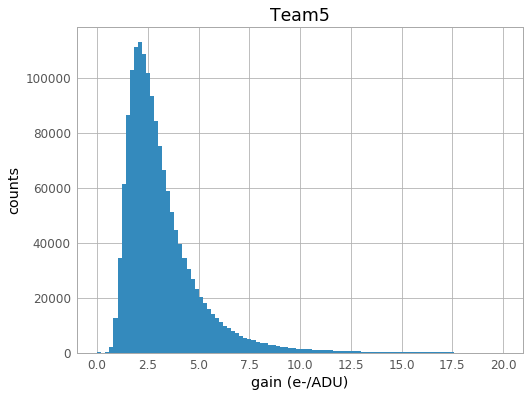

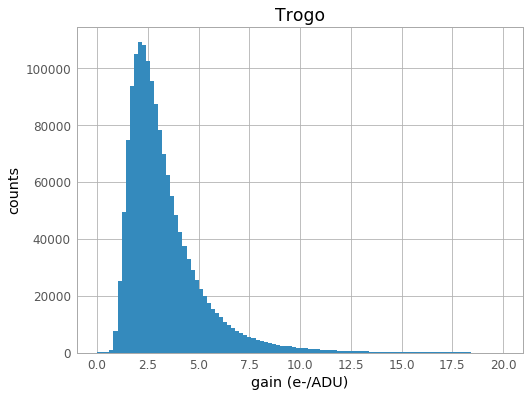

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np
import scipy as sp

int_times = []
gains = []
read_noises = []
means_flats_sub_bias = []
gain_each_pixel_list = []
flat_sub_biases_all = []
biases_all = []

#this function takes in the biases and flats for each data set, along with the corresponding integration time and team name
#the function calculates the read noise and gain determined for the data set inputted.  Useful values are added to the corresponding lists created above

def reduce_biases(Biases,Flats,integration_time,teamname):
    bias = []
    flat_list = []
  
    
    for i in range(1,11):
        bias.append(fits.getdata(Biases.format(i) , ext=0).astype(np.int))

    for i in range(11,21):
        flat_list.append(fits.getdata(Flats.format(i) , ext=0).astype(np.int))


    mean_bias_perpixel = np.asarray(bias).mean(axis=0) #array of mean of each pixel
    var_bias_perpixel = np.asarray(bias).var(axis=0)  #asarray makes sure python considers the cube as a numpy array. 
    std_bias_perpixel = np.asarray(bias).std(axis=0)#axis = 0 specifies that we want the first axis of our cube of data.  



    flat_sub_bias = [flat - mean_bias_perpixel for flat in flat_list]

    var_flat_perpixel = np.asarray(flat_sub_bias).var(axis=0)
    mean_flat_perpixel = np.asarray(flat_sub_bias).mean(axis=0)

    gain_each_pixel = mean_flat_perpixel/var_flat_perpixel
    
    plt.figure(teamname)
    n, b, patches = plt.hist(gain_each_pixel.flatten(),100,range=(0,20))  #good??
    gain = np.where(n == n.max())
    gain = b[gain][0]
    plt.xlabel('gain (e-/ADU)')
    plt.ylabel('counts')
    plt.title(teamname)
    plt.show
    
    mean_of_bias_std = std_bias_perpixel.mean()
    readnoise = gain*mean_of_bias_std #read noise per pixel
    print(teamname,'readnoise = ', readnoise)
    mean_flats_sub_bias = np.asarray(flat_sub_bias).mean()

    int_times.append(integration_time)
    gains.append(gain)
    read_noises.append(readnoise)
    means_flats_sub_bias.append(mean_flats_sub_bias)
    gain_each_pixel_list.append(gain_each_pixel)
    flat_sub_biases_all.append(flat_sub_bias)
    biases_all.append(bias)
    
reduce_biases("ABias000000{:02d}.fit","AFlatField000000{:02d}.fit",90,"Team2Awesome") #the :02d makes a one digit integer be written with a zero first so that the loop can take in all images, not just 1-9 then another loop for two digit frame numbers
reduce_biases("QBias000000{:02d}.fit","QFlatField000000{:02d}.fit",100,"TeamNot6")
reduce_biases("SBias000000{:02d}.fit","SFlatField000000{:02d}.fit",75,"Sharknado")
reduce_biases("Group4_2/aBias000000{:02d}.fit","Group4_2/aFlatField000000{:02d}.fit",150,"Group4")
reduce_biases("kBias000000{:02d}.fit","kFlatField000000{:02d}.fit",60,"Team5")
reduce_biases("TBias000000{:02d}.fit","TFlatField000000{:02d}.fit",120,"Trogo")

print('gain for our data set = ',gains[0])

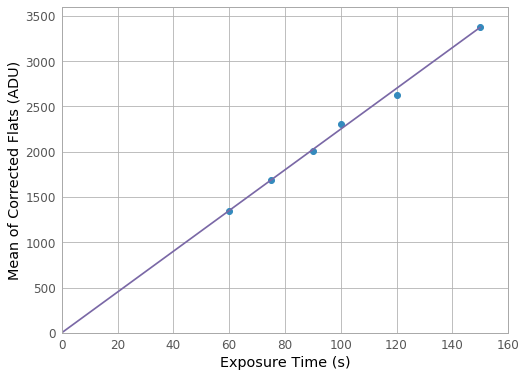

In [36]:
#this cell plots the mean counts in the corrected flats versus the corresponding exposure time to show linearity in the response of the ccd

plt.plot(int_times,means_flats_sub_bias, 'o')
plt.plot([0,150],[0,3371.87188498])  #3371.87188498 is the max of means_flats_sub_bias
plt.xlabel('Exposure Time (s)')
plt.ylabel('Mean of Corrected Flats (ADU)')
plt.xlim(0,160)
plt.ylim(0,3600)
plt.show()

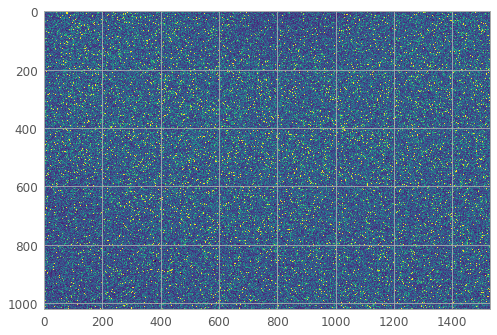

In [37]:
#an image showing the gain in each pixel, for our data set
plt.imshow(gain_each_pixel_list[0],vmin=0,vmax=10,cmap="viridis")


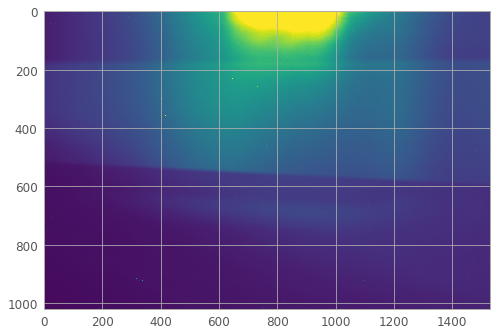

In [38]:
#an image of one of our flat fields to show the nonuniformity that could lead to errors and discrepencies between data sets
plt.imshow(flat_sub_biases_all[0][0],vmin=100,vmax=8000,cmap="viridis")


In [39]:
#PART 2
#this cell uploads each bias and dark, adding them to the corresponding list'
bias_list_2 = []  #list of biases, lower temps first
dark_list = []  #list of darks, lower temps first

bias_list_2.append(fits.getdata("dark_current_data/ABias00000021.fit", ext=0).astype(np.int))
bias_list_2.append(fits.getdata("dark_current_data/ABias00000022.fit", ext=0).astype(np.int))
bias_list_2.append(fits.getdata("dark_current_data/ABias00000025.fit", ext=0).astype(np.int))
bias_list_2.append(fits.getdata("dark_current_data/ABias00000026.fit", ext=0).astype(np.int))
bias_list_2.append(fits.getdata("dark_current_data/ABias00000029.fit", ext=0).astype(np.int))
bias_list_2.append(fits.getdata("dark_current_data/ABias00000030.fit", ext=0).astype(np.int))
bias_list_2.append(fits.getdata("dark_current_data/ABias00000033.fit", ext=0).astype(np.int))
bias_list_2.append(fits.getdata("dark_current_data/ABias00000034.fit", ext=0).astype(np.int))
bias_list_2.append(fits.getdata("dark_current_data/ABias00000037.fit", ext=0).astype(np.int))
bias_list_2.append(fits.getdata("dark_current_data/ABias00000038.fit", ext=0).astype(np.int))
    

dark_list.append(fits.getdata("dark_current_data/ADark00000023.fit" , ext=0).astype(np.int))
dark_list.append(fits.getdata("dark_current_data/ADark00000024.fit" , ext=0).astype(np.int))
dark_list.append(fits.getdata("dark_current_data/ADark00000027.fit" , ext=0).astype(np.int))
dark_list.append(fits.getdata("dark_current_data/ADark00000028.fit" , ext=0).astype(np.int))
dark_list.append(fits.getdata("dark_current_data/ADark00000031.fit" , ext=0).astype(np.int))
dark_list.append(fits.getdata("dark_current_data/ADark00000032.fit" , ext=0).astype(np.int))
dark_list.append(fits.getdata("dark_current_data/ADark00000035.fit" , ext=0).astype(np.int))
dark_list.append(fits.getdata("dark_current_data/ADark00000036.fit" , ext=0).astype(np.int))
dark_list.append(fits.getdata("dark_current_data/ADark00000039.fit" , ext=0).astype(np.int))
dark_list.append(fits.getdata("dark_current_data/ADark00000040.fit" , ext=0).astype(np.int))


In [40]:
#this cell averaged the biases for each temperature then subtracts the averaged bias from the corresponding darks at that temperature
#the corrected darks at each temperature are then averaged
darks_averaged = []
bias_averaged = []
darks_sub_bias = []
temps = [-6,-1,4,9,14]

for i in np.arange(0,10,2):
    bias_averaged.append((bias_list_2[i]+bias_list_2[i+1])/2)
    
for j in range(0,10):
    darks_sub_bias.append((dark_list[j]-bias_averaged[int(j/2)])/2)
    
for k in np.arange(0,10,2):
    darks_averaged.append((darks_sub_bias[k]+darks_sub_bias[k+1])/2)
    

In [41]:
#The following five cells serve to remove outliear pixels by identifying cutoff points and only including pixels under the cutoff point
fig,(ax0,ax1,ax2) = plt.subplots(3,1)

ax0.hist(darks_averaged[0].flatten(),bins=200,range=(-20,40))
ax0.axvline(np.mean(darks_averaged[0]),color='r')
ax1.hist(darks_averaged[0].flatten(),bins=200,range=(10,200))
ax1.axvline(np.mean(darks_averaged[0]),color='r')
ax2.hist(darks_averaged[0].flatten(),bins=200,range=(-20,40))
ax2.axvline(np.mean(darks_averaged[0][np.where(darks_averaged[0] < 40)]),color='r')
darks_avg_0_mean = np.mean(darks_averaged[0][np.where(darks_averaged[0] < 40)])*gains[0]/90  
#this is the dark current for that temperature

ax2.set_xlabel('ADU')
ax1.set_ylabel('number of pixels')
ax0.set_title("-6 degrees celcius")
plt.show()

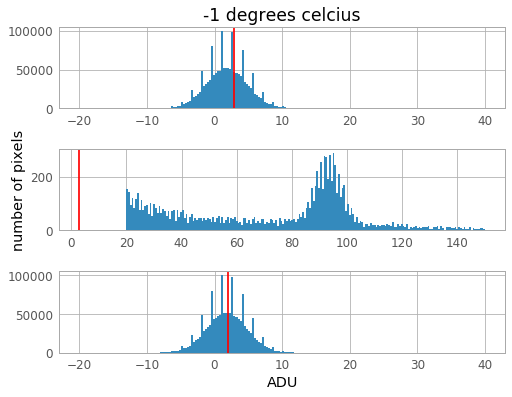

In [42]:
#outliers 2
fig,(ax0,ax1,ax2) = plt.subplots(3,1)

ax0.hist(darks_averaged[1].flatten(),bins=200,range=(-20,40))
ax0.axvline(np.mean(darks_averaged[1]),color='r')
ax1.hist(darks_averaged[1].flatten(),bins=200,range=(20,150))
ax1.axvline(np.mean(darks_averaged[1]),color='r')
ax2.hist(darks_averaged[1].flatten(),bins=200,range=(-20,40))
ax2.axvline(np.mean(darks_averaged[1][np.where(darks_averaged[1] < 75)]),color='r')
darks_avg_1_mean = np.mean(darks_averaged[1][np.where(darks_averaged[1] < 75)])*gains[0]/90

ax2.set_xlabel('ADU')
ax1.set_ylabel('number of pixels')
ax0.set_title("-1 degrees celcius")
plt.show()


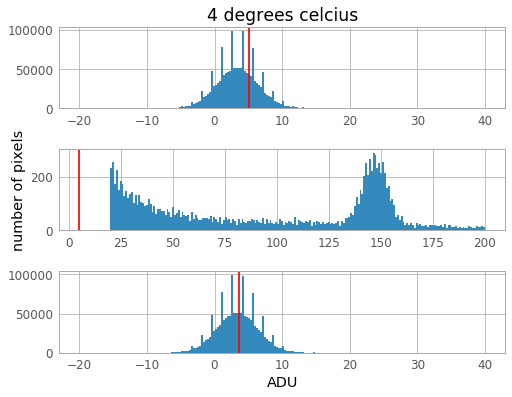

In [43]:
#outliers 3
fig,(ax0,ax1,ax2) = plt.subplots(3,1)

ax0.hist(darks_averaged[2].flatten(),bins=200,range=(-20,40))
ax0.axvline(np.mean(darks_averaged[2]),color='r')
ax1.hist(darks_averaged[2].flatten(),bins=200,range=(20,200))
ax1.axvline(np.mean(darks_averaged[2]),color='r')
ax2.hist(darks_averaged[2].flatten(),bins=200,range=(-20,40))
ax2.axvline(np.mean(darks_averaged[2][np.where(darks_averaged[2] < 120)]),color='r')
darks_avg_2_mean = np.mean(darks_averaged[2][np.where(darks_averaged[2] < 120)])*gains[0]/90

ax2.set_xlabel('ADU')
ax1.set_ylabel('number of pixels')
ax0.set_title("4 degrees celcius")
plt.show()



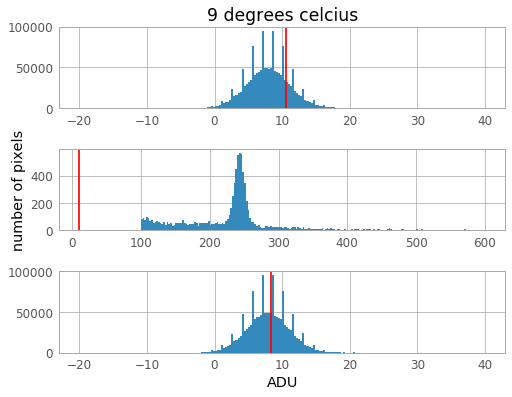

In [44]:
#outliers 4

fig,(ax0,ax1,ax2) = plt.subplots(3,1)

ax0.hist(darks_averaged[3].flatten(),bins=200,range=(-20,40))
ax0.axvline(np.mean(darks_averaged[3]),color='r')
ax1.hist(darks_averaged[3].flatten(),bins=200,range=(100,600))
ax1.axvline(np.mean(darks_averaged[3]),color='r')
ax2.hist(darks_averaged[3].flatten(),bins=200,range=(-20,40))
ax2.axvline(np.mean(darks_averaged[3][np.where(darks_averaged[3] < 200)]),color='r')
darks_avg_3_mean = np.mean(darks_averaged[3][np.where(darks_averaged[3] < 200)])*gains[0]/90

ax2.set_xlabel('ADU')
ax1.set_ylabel('number of pixels')
ax0.set_title("9 degrees celcius")
plt.show()

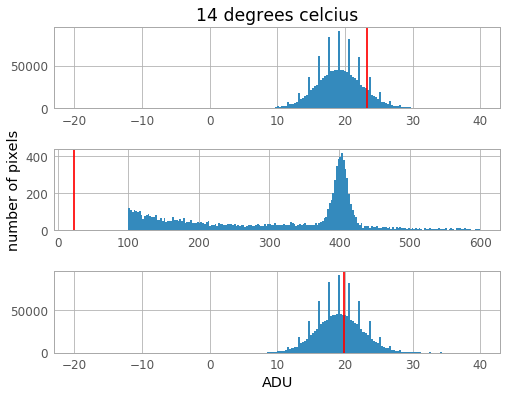

In [45]:
#outliers 5

fig,(ax0,ax1,ax2) = plt.subplots(3,1)

ax0.hist(darks_averaged[4].flatten(),bins=200,range=(-20,40))
ax0.axvline(np.mean(darks_averaged[4]),color='r')
ax1.hist(darks_averaged[4].flatten(),bins=200,range=(100,600))
ax1.axvline(np.mean(darks_averaged[4]),color='r')
ax2.hist(darks_averaged[4].flatten(),bins=200,range=(-20,40))
ax2.axvline(np.mean(darks_averaged[4][np.where(darks_averaged[4] < 300)]),color='r')
darks_avg_4_mean = np.mean(darks_averaged[4][np.where(darks_averaged[4] < 300)])*gains[0]/90

ax2.set_xlabel('ADU')
ax1.set_ylabel('number of pixels')
ax0.set_title("14 degrees celcius")
plt.show()

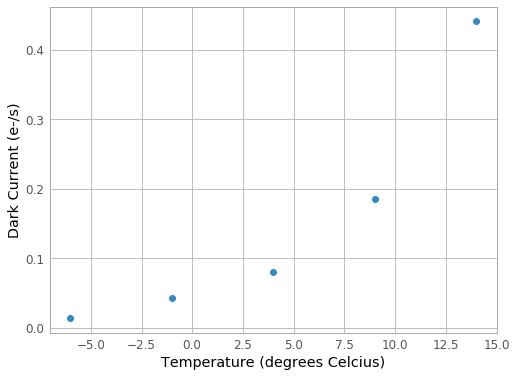

In [46]:
#the mean dark current values for each temperature are added to a list and plotted versus temperature
mean_dark_pixels_list = []
mean_dark_pixels_list.append(darks_avg_0_mean)
mean_dark_pixels_list.append(darks_avg_1_mean)
mean_dark_pixels_list.append(darks_avg_2_mean)
mean_dark_pixels_list.append(darks_avg_3_mean)
mean_dark_pixels_list.append(darks_avg_4_mean)
plt.plot(temps,mean_dark_pixels_list,'o')

plt.xlabel('Temperature (degrees Celcius)')
plt.ylabel('Dark Current (e-/s)')
plt.show()

A=2.56932258647e+15, E=2.24996862756


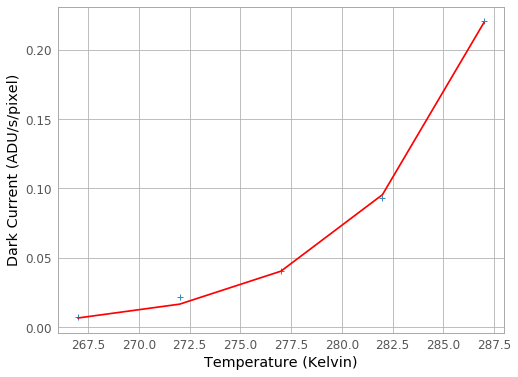

In [47]:
#a curve of the dark current function is fitted to the data to estimate the constants in the equation
from scipy.optimize import curve_fit 

k = 8.61733034*(10**(-5)) #eV/K


def Dark_Current (T,A,E):  
    DC = A*T**(3/2)*(np.exp((-1)*E/(2*k*T)))
    return DC

xvals = np.array(temps)+273
yvals = np.array(mean_dark_pixels_list)
yvals = yvals/gains[0]
At,Et = (1000000,1.00)


coeffs, fiterr = curve_fit(Dark_Current, xvals, yvals, p0=(At,Et),maxfev = 1000)

print ("A=%s, E=%s" % (coeffs[0], coeffs[1]))
plt.plot(xvals,yvals, '+')
plt.plot(xvals,Dark_Current(xvals,*coeffs),'r')
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Dark Current (ADU/s/pixel)')
plt.show()

#fit curve from linear regression algorithm